# EDA on Telecom Churn Dataset

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data

In [5]:
df = pd.read_csv("Telco-Customer-Data.csv") 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


datatype of total charges is non-numeric

In [7]:
df['total_charges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.shape

(7043, 22)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,total_charges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


1. Insights from senior citizen column are not relevant here because it is a categorival variable
2. Average tenure is 32 months and 75% customers have tenure less than 89 months
3. On average customers are paying 64$, but only 25% cutomers are paying more than 90 USD

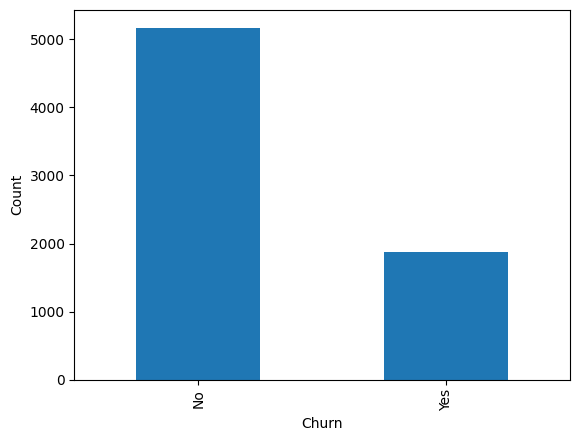

In [11]:
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count');

In [12]:
(df['Churn'].value_counts(normalize=True))*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

This data is highly imbalanced. During Modelling we have to take care of this point

In [13]:
# Missing Value
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
total_charges       11
dtype: int64

11 Null values in total charges,very low number hence these values can be dropped

In [14]:
df.loc[df['total_charges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [15]:
#Drop null values
df['total_charges'].dropna(inplace=True)

In [16]:
df['tenure'].nunique()

73

Column tenure have 73 values ranging 0 to 72. It can be a tedious task to deal with such a large number, hence we can create bins to simply this

In [17]:
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]

df['tenure_group'] = pd.cut(df.tenure,range(0,80,12),right=False,labels=labels)

In [18]:
df['tenure_group'].value_counts()

tenure_group
1-12     2069
61-72    1121
13-24    1047
25-36     876
49-60     820
37-48     748
Name: count, dtype: int64

In [19]:
# customer id is not useful in our analysis, and we have grouped the tenure already hence we can drop them
df.drop(columns = ['customerID','tenure'],inplace=True)

In [20]:
df.shape

(7043, 21)

## Data Exploration

### Univariate Analysis

In [21]:
# select categorical variables
cat = list(df.select_dtypes(object).drop(columns=['Churn','TotalCharges']).columns)

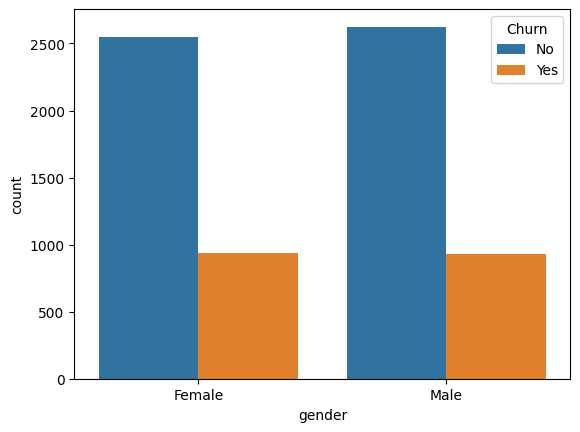

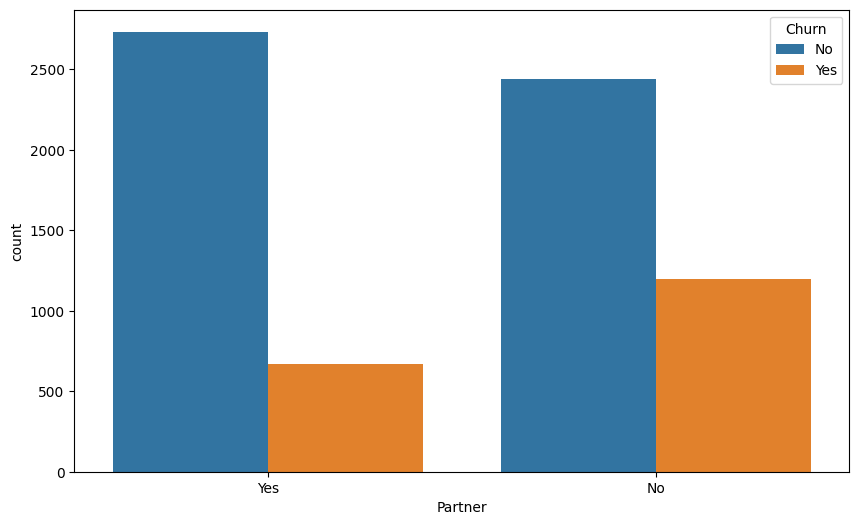

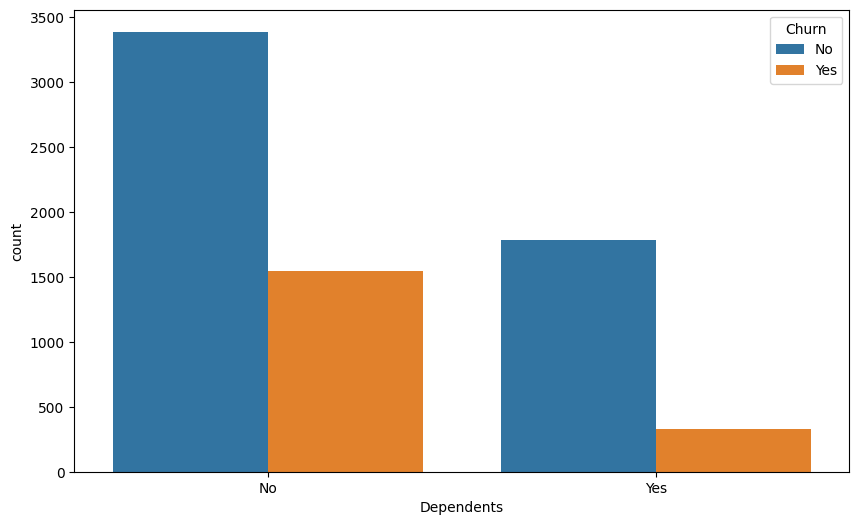

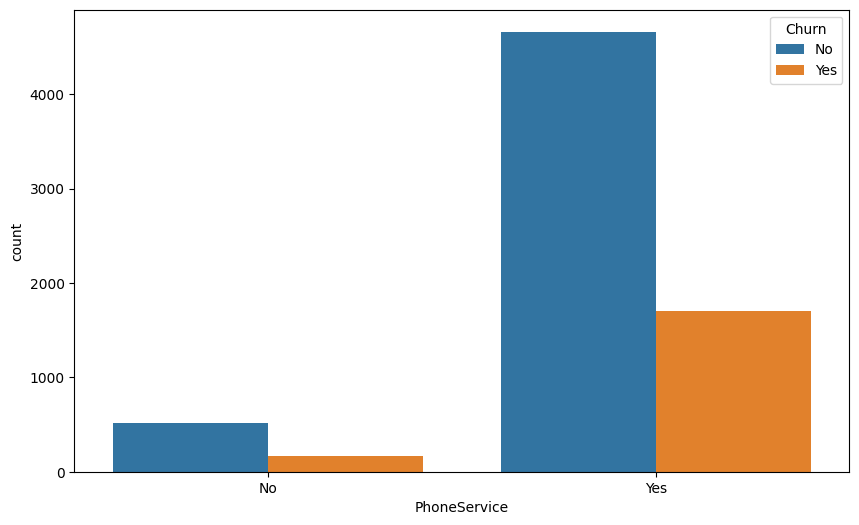

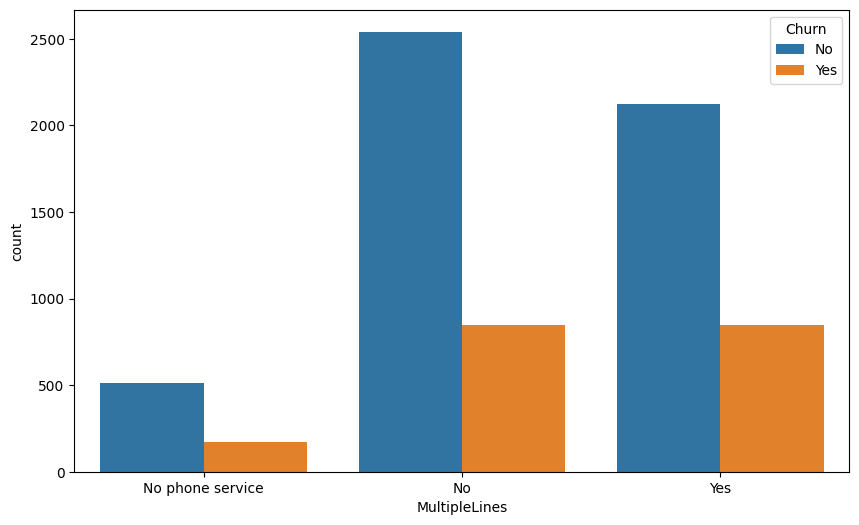

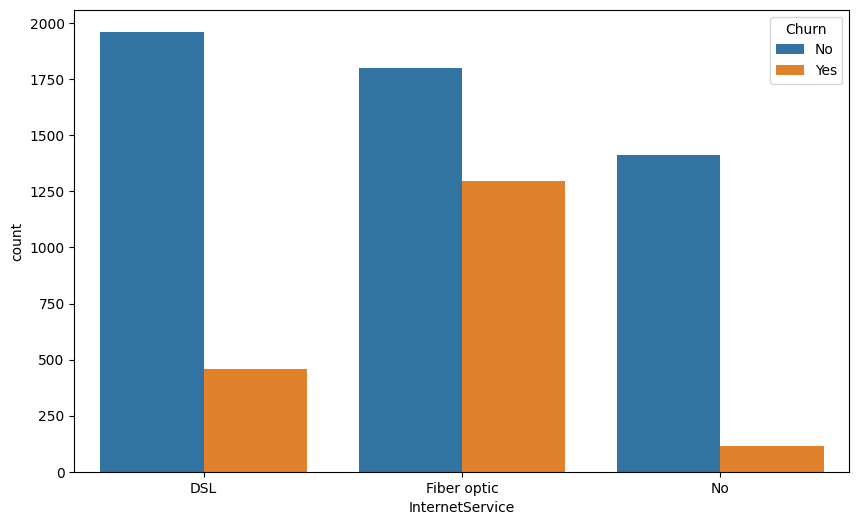

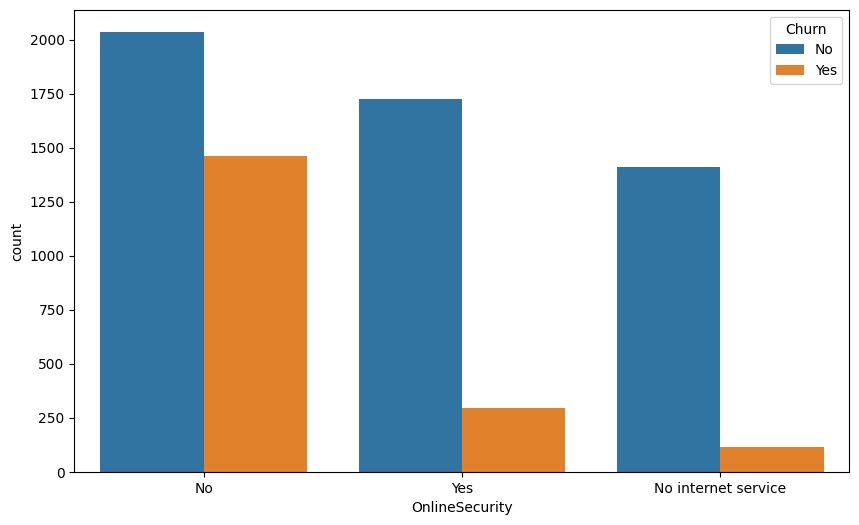

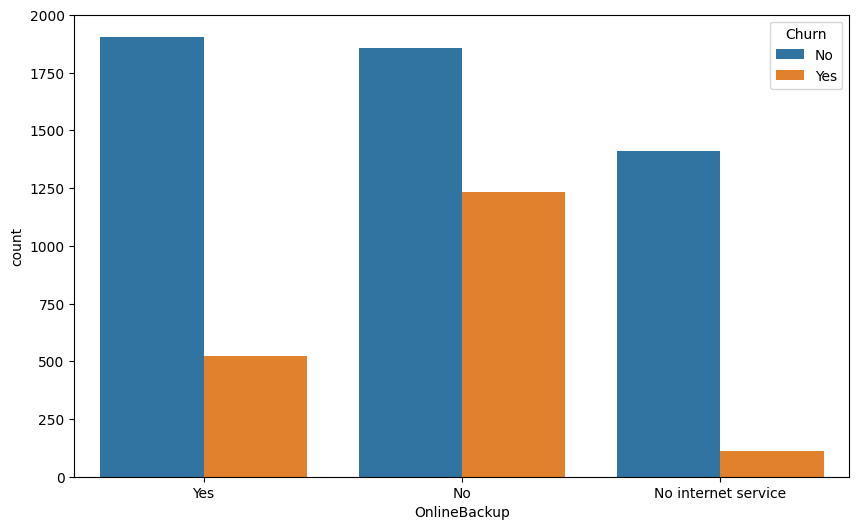

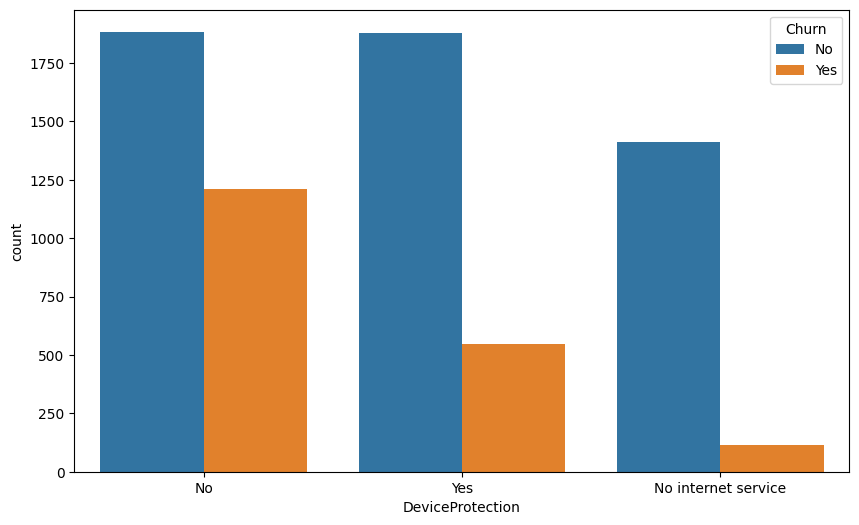

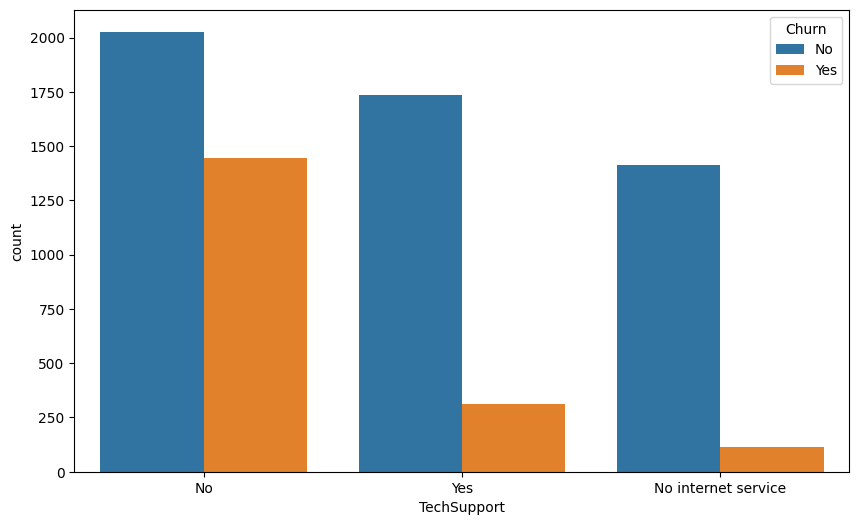

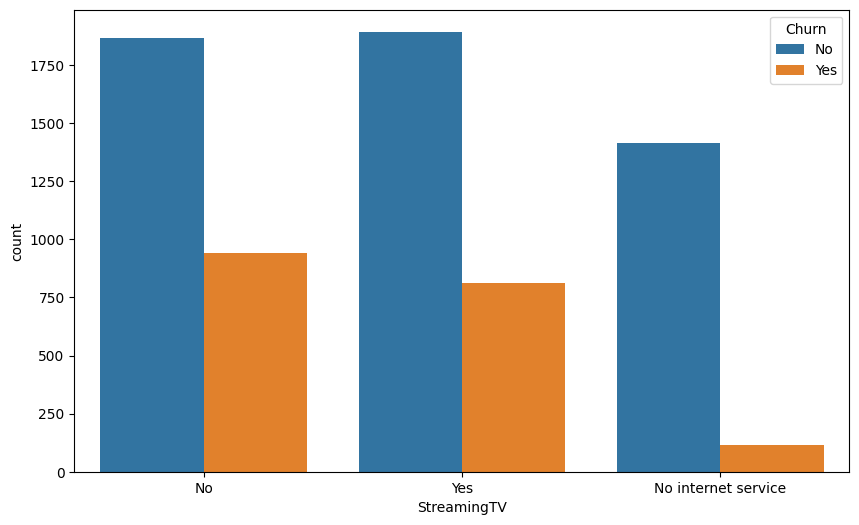

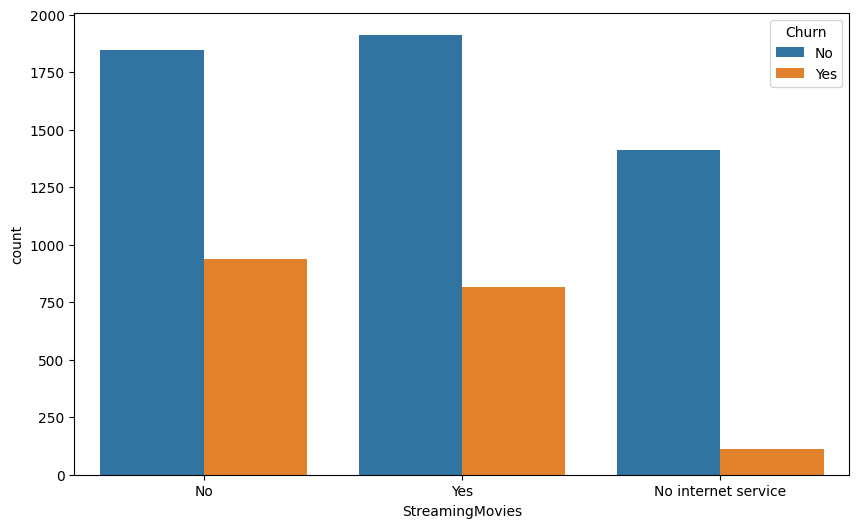

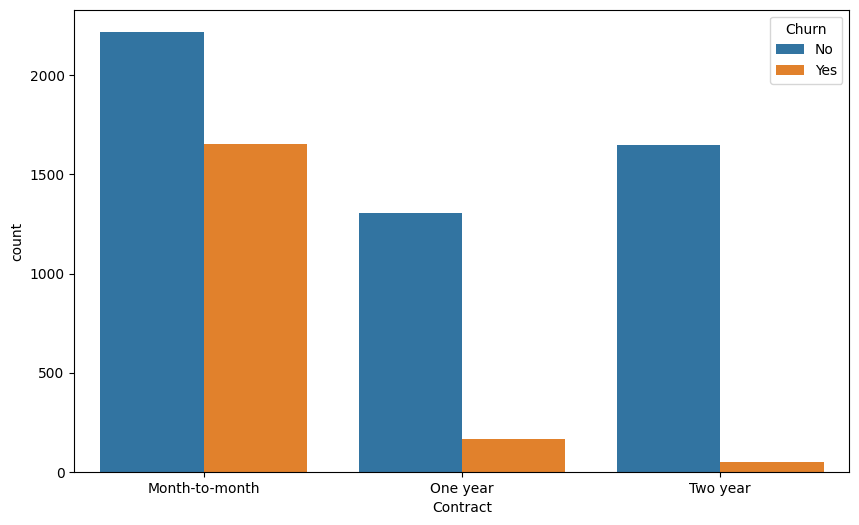

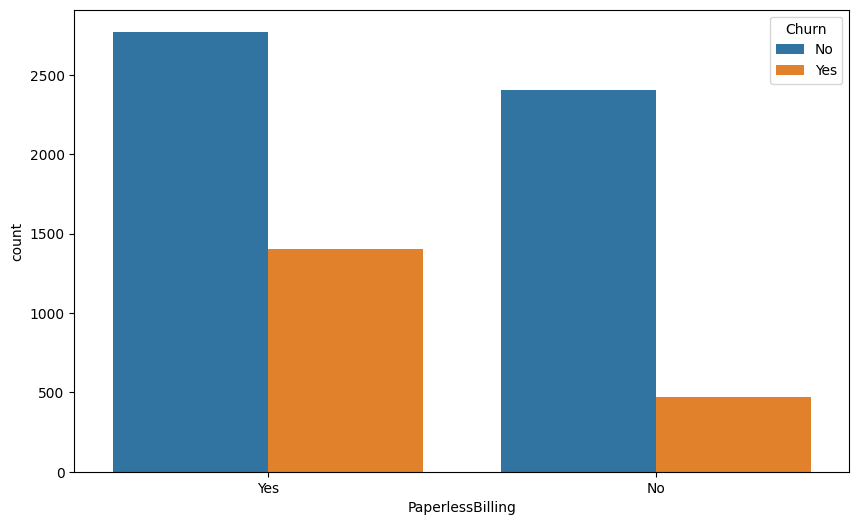

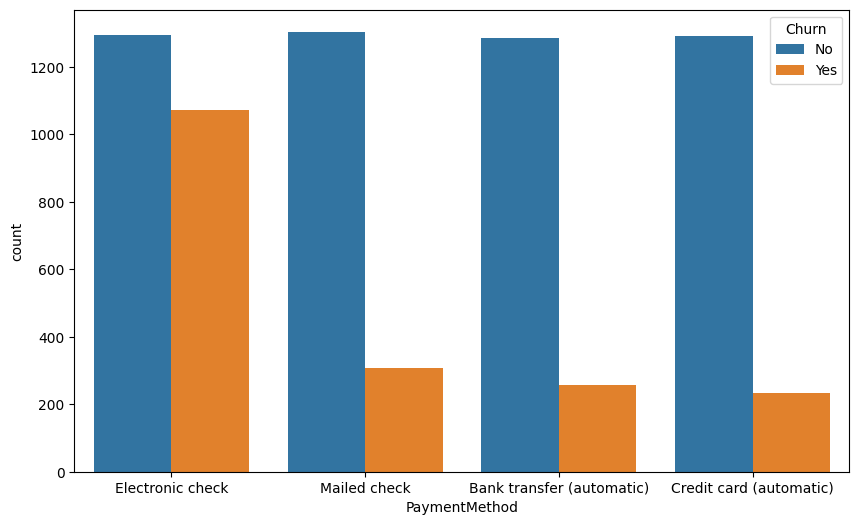

<Figure size 1000x600 with 0 Axes>

In [39]:
for i in cat:
    sns.countplot(data=df,x=i,hue='Churn')
    plt.figure(i,figsize=(10,6))

Converting Categorical variable to 

In [22]:
df['Churn']=np.where(df.Churn == 'Yes',1,0)

In [23]:
df_dummies = pd.get_dummies(df.drop(columns='TotalCharges'),dtype=int)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,Churn,total_charges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,0,29.85,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,0,1889.50,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,1,108.15,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,0,1840.75,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,1,151.65,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between monthly charges and annual charges

C:\Users\Narayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


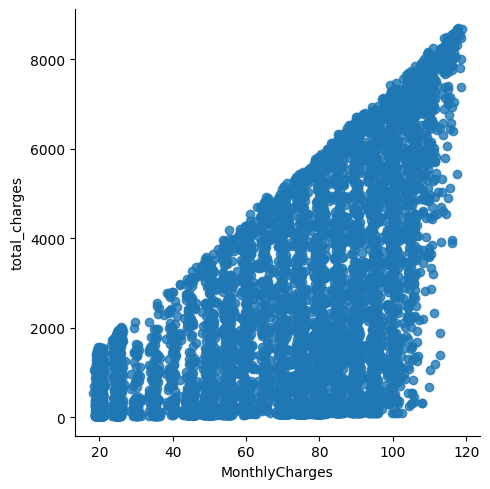

In [20]:
sns.lmplot(data=df_dummies,x="MonthlyCharges",y="total_charges",fit_reg=False);

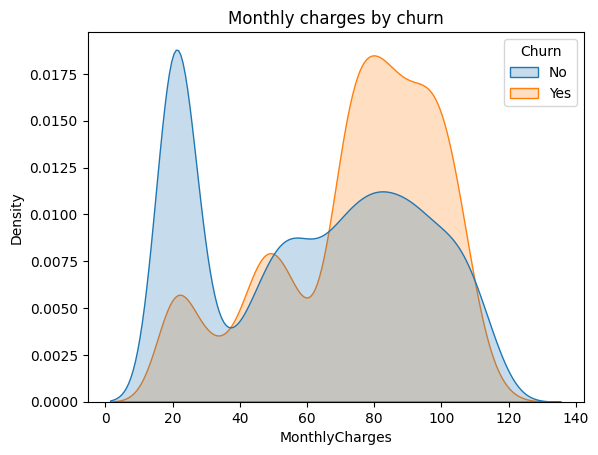

In [22]:
sns.kdeplot(data=df,x="MonthlyCharges",hue='Churn',fill=True,common_norm=False)
plt.title("Monthly charges by churn");

**When Monthly Charges are high, churn is also high**

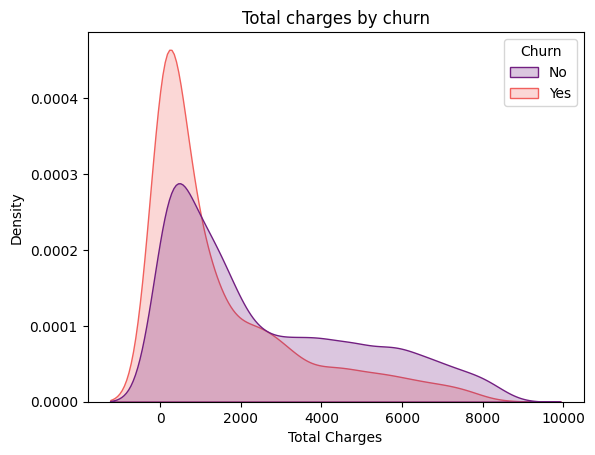

In [23]:
sns.kdeplot(data=df,x="total_charges",hue='Churn',fill=True,common_norm=False,palette="magma")
plt.xlabel("Total Charges")
plt.title("Total charges by churn");

**When Total Charges are low Churn is high** This is surprising Insight and need further analysis. For example we can compare it with tenure

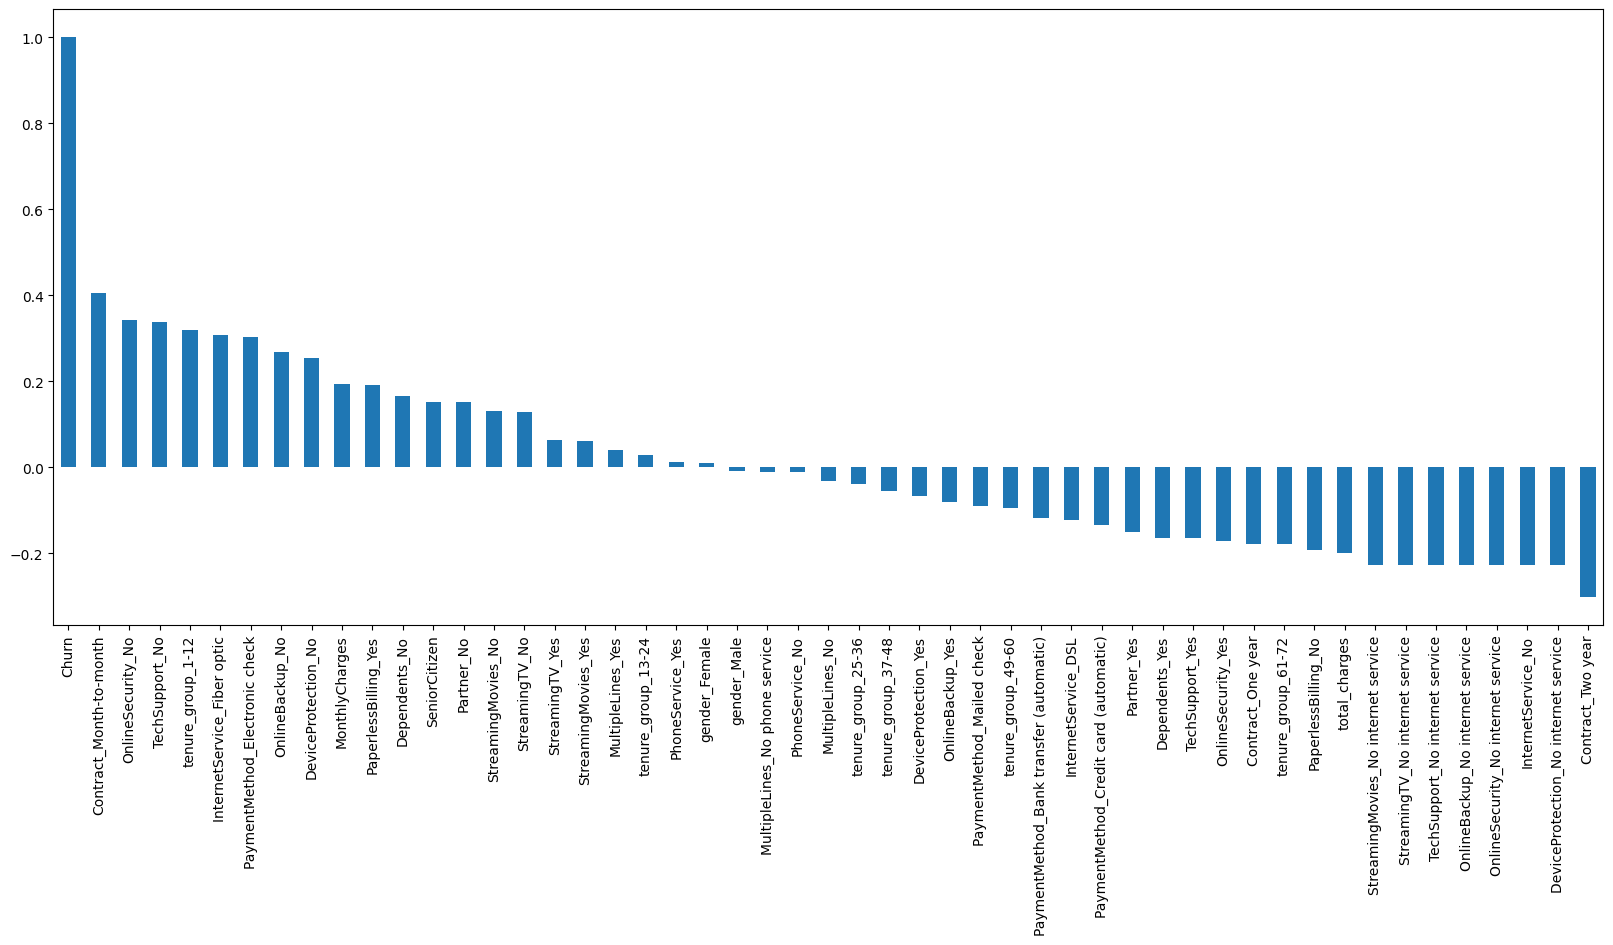

In [45]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

**Insights**

High Churn is seen in - Month to month contracts,When No online Security is there and when there is not tech support

Low churn is seen in -  Long term contracts, Subscriptions without internet service and no internet service.

Factors like gender,multiple lines have no impact on Churn

<Axes: >

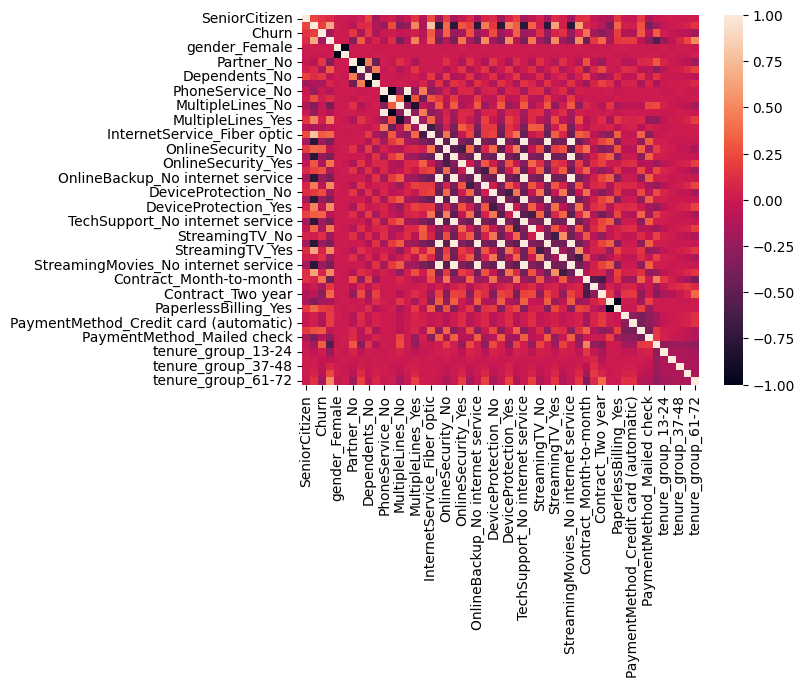

In [46]:
sns.heatmap(df_dummies.corr())

In [24]:
df_dummies.to_csv('df_tel.csv')